# Recurrent Neural Network

- Just like regular NN, Recurrent NN have weights, biases, layers and activation functions. In addition, they have feedback loops. That recursive loop makes it possible to use *sequential* input values (like the same data but that changes over time).

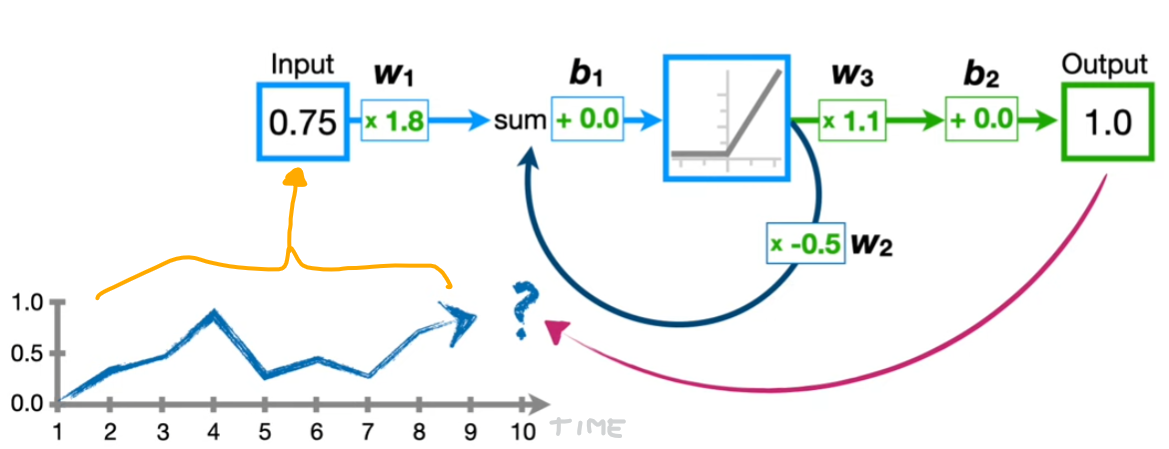

- In the first execution, a single input value is given (for example the "yesterday" value of a stock market) and an output is produced (the predicted "today" value of the stock market). Then, in the second execution, as input value it's given today's value (the real one, not the predicted) and to the hidden layer is added the output of the hidden layer of the first execution, and in the end in the output is produced the predicted "tomorrow" value. Therefore in the second execution, it's inserted information of the first execution.

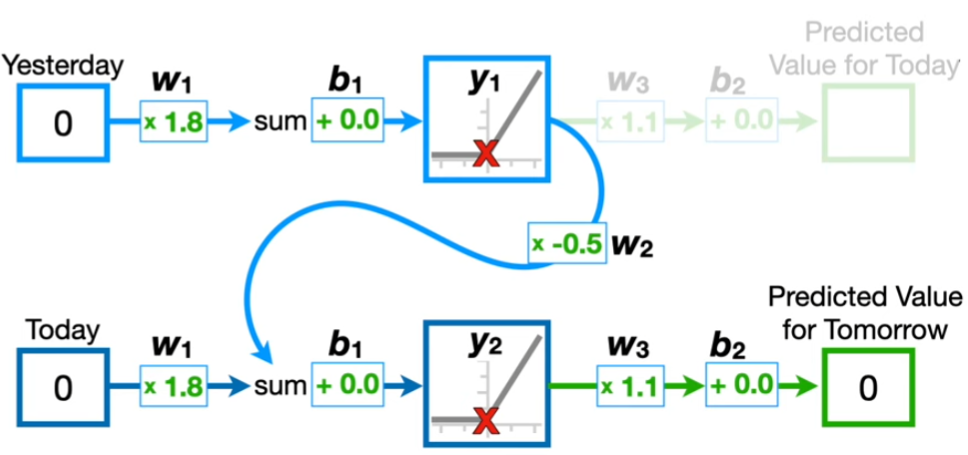

- The input size ramains the same. 
- The weights and biases are the same for all the executions. It means that independently from the number of "unrolls"/"unfolds" (executions) we have to make to train the data, the number of weights and biases remains the same.
- These two factors make it possible to learn a single model that operates on all time steps and all sequence lengths, rather than needing to learn a separate model for all possible time steps

- The total loss for a given sequence (paired with a sequence of target values) is 
obtained just as the sum of the losses over all the time steps

- The backpropagation is the iteration "back in time" of the unrolled NN: from the last execution to the first, it executes a gradient computation like in normal NN.

- **Vanishing/Exploding Gradient**: when dealing with "long term" data (large dataset), due to having the same weights for all the rolls/folds/executions (especially the $w_2$), it can easily make the gradient explode (when it's $w_2>1$) or vanish ($w_2<1$), making respectively too big and too small steps for the gradient descent.
- It does not mean that it is impossible to learn, but that it might take a very long time to learn long-term dependencies (it's suggested max 20 iterations...)

---
# Bidirectional RNN

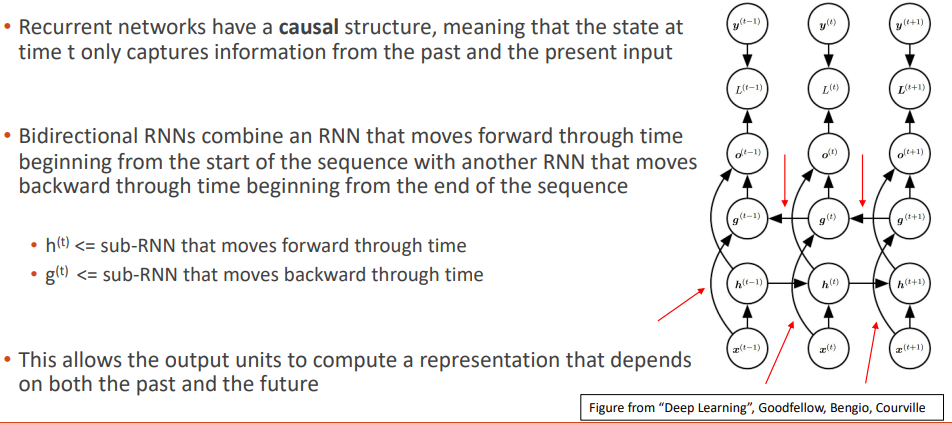

---
# Long Short-Term Memory (LSTM)

- LSTM uses different paths to predict short and long term memories (data), avoiding the exploding/vanishing gradient problem.
- It's a RNN where each execution is a combination of several components, and keeps the same weights and biases for all executions as a typical RNN.

- It uses sigmoid ([0,1]) and tanh ([-1,1]) activation functions.
- https://youtu.be/YCzL96nL7j0?t=358

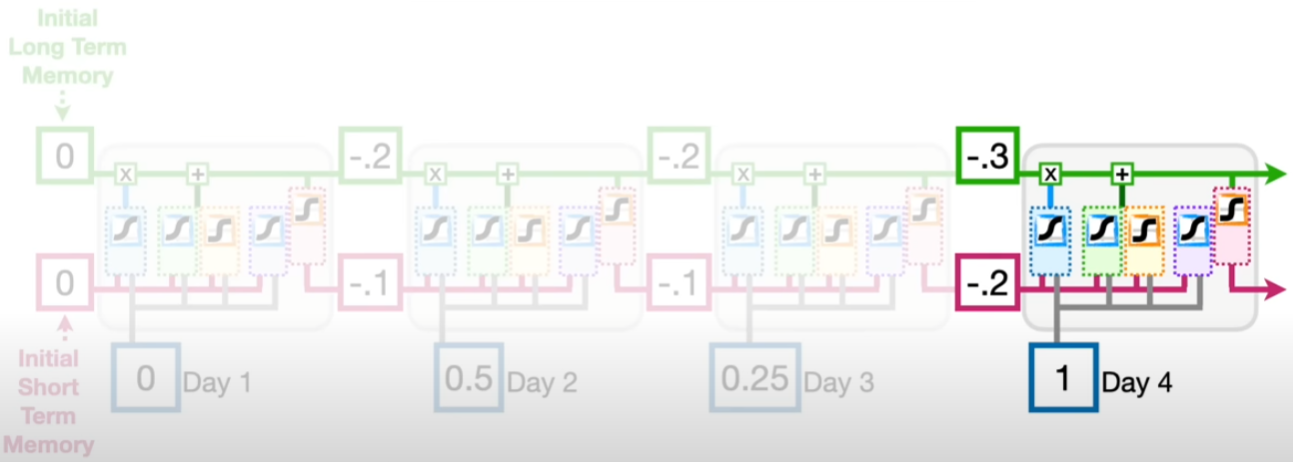

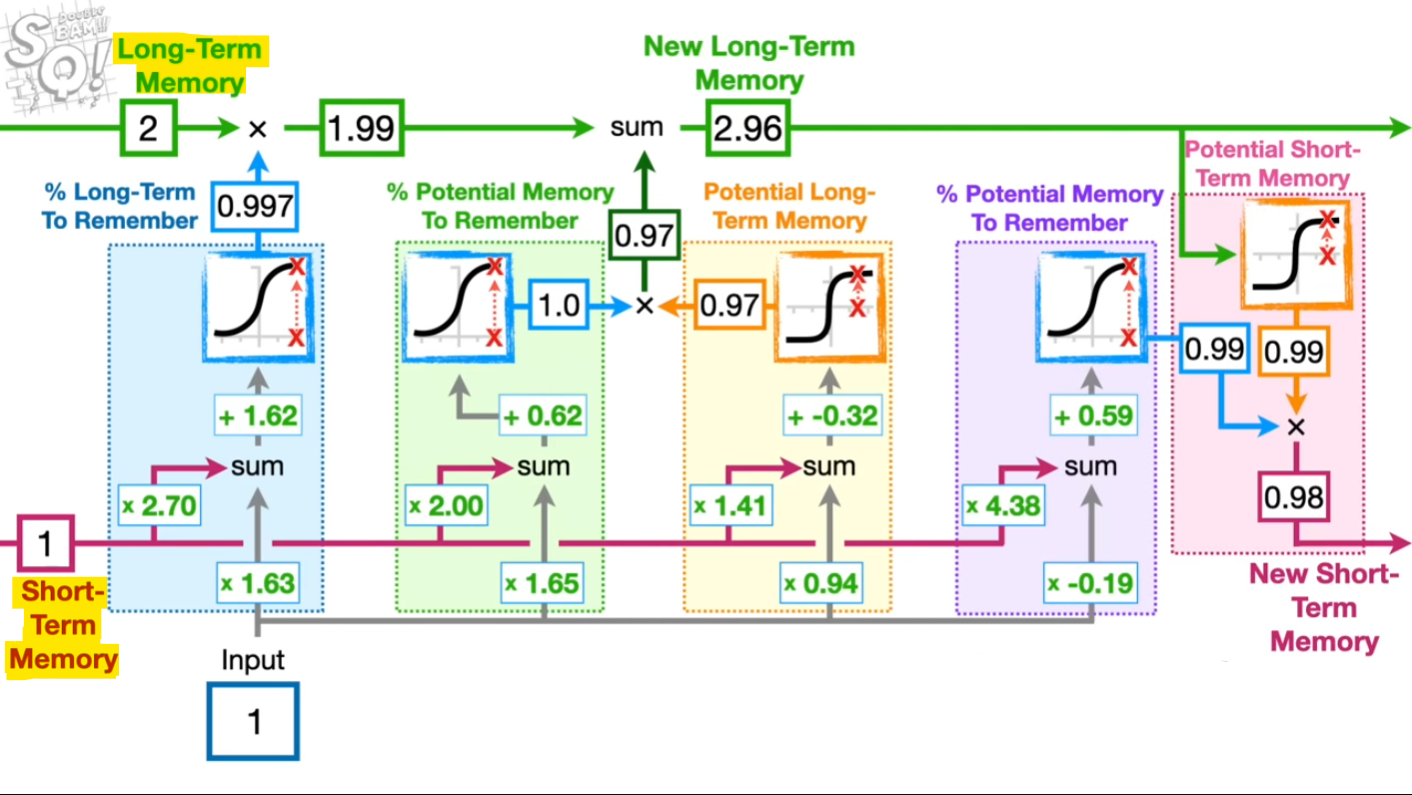

- The green line on the to is the **cell state**
- In order from left to right:
    - **Forget gate**. decides what information we're going to throw away from the cell state, with a sigmoid activation
    - **Input gate**. decides what new information we're going to store in the cell state
        - sigmoid activation to get the percentage of the long term memory to remember
        - tanh activation to get the new long term memory
    - **Output gate**. decides what is the new short term memory
        - sigmoid activation to get the percentage of the short term memory to remember
        - tanh activation to get the new short term memory
- The final Short-Term Memory is the output of the unrolled LSTM!

---
## seq2seq
From a sequence of N elements predict a sequence of N elements (the models seen above)

## seq2vec: **Encoder**
From a sequence of N elements predict a vector of 1 element, usually called **context**

## vec2seq: **Decoder**
From a vector of 1 element predict a sequence of N elements


## seq2seq: **Encoder-Decoder**
(Many parallel) LSTM model(s) (encoder) to create a size-fixed context, then (many parallel) LSTM model(s) (decoder) to create an output.
The initial input is given to an **Embedding layer** that converts the nominal data into numerical data, keeping track of the words positioning.

https://youtu.be/L8HKweZIOmg?t=156


---

# Attention
- To overcome the bottleneck generated by the fixed size of the Context, attention is used.
- The encoder pretty much stays the same. Each step of decoding has access to the individual encodings for each input word, and it uses similarity and softmax to determine what percentage of each encoded input word should be used to help predict the next output word.
- In this way, it turns out that we don't need more of the LSTMs. See Transformers.
- https://youtu.be/PSs6nxngL6k?t=361

---

# Transformers
- https://youtu.be/zxQyTK8quyY?t=86
- https://medium.com/data-at-the-core/how-llms-work-explained-in-9-steps-transformer-acrhitecture-f35d06d1ee72
- Transformers very short summary: https://www.youtube.com/watch?v=bQ5BoolX9Ag&t=2105s
- Decoder-Only Transformers, Masked Self-Attention: https://www.youtube.com/watch?v=bQ5BoolX9Ag&t=617s